# Исследование надежности заемщиков

**Описание проекта**

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Описание данных** 

Входные данные от банка — статистика о платёжеспособности клиентов. Предоставлены в виде файла `data.csv`. 

**План работы** 
1. Загрузить и изучить общую информацию о данных
2. Предобработка данных 
3. Исследовать и проанализировать данные 
4. Сформулировать общий вывод 


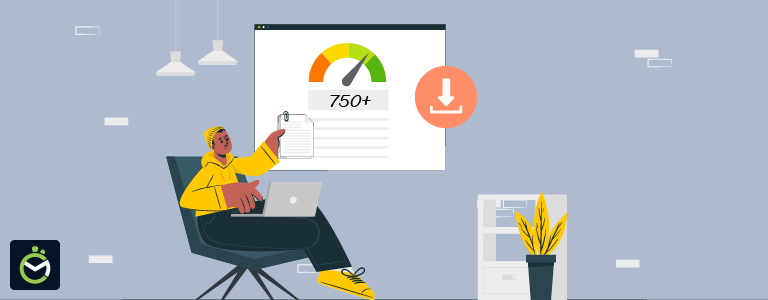

## Загрузка и изучение данных
**Импортируем библиотеки для работы в проекте**

In [1]:
import pandas as pd
import numpy as np
from nltk.stem import SnowballStemmer 
from pymystem3 import Mystem

**Считаем данные из csv-файла в датафрейм и сохраните в переменную data** 

In [2]:
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Ознакомимся с информацией датафрейма** 

Выведем первые 20 строчек датафрейма data на экран

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Выведем основную информацию о датафрейме с помощью метода info()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**ВЫВОД:** 
- Датафрем содержит 12 столбцов по 21525 строк каждый. 
- В столбцах days_employed, total_income содержатся пропуски. Пропуски в исходной таблице могут появиться о двум основным причинам:
  - При заполнении - человеческий фактор (например, вместо нуля или ответа поставлен прочерк или оставлена пустая ячейка)
  - Ошибки при выгрузке. В данном случае маловероятно
- Мы видим отрицательные значения в столбце days_employed, что нелогично. В столбце education	информация заполнена текстом с разым регистром, а в столбце purpose, вероятнее всего информация заполнена в свободной форме. Предстоит обработка даннх, прежде чем м сможем их правнвлизировать. 

## Предобработка данных

### Удаление пропусков

**Выведем количество пропущенных значений для каждого столбца** 

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В двух столбцах есть пропущенные значения. Один из них — days_employed. Пропуски в этом столбце вы обработаем на следующем этапе. Другой столбец с пропущенными значениями — total_income — хранит данные о доходах. 
Сумма дохода, вероятнее всего, завсист от типа занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца income_type. 

**Заполнить пропуски медианным значением — лучшее решение для количественных переменных**, поскольку медиана — это такое число в выборке, что ровно половина элементов больше него, а другая половина — меньше. Среднее значение некорректно характеризует данные, когда некоторые значения сильно выделяются среди большинства. Так, например, пропуски трудового стажа в днях лучше заполнять медианнм значением, поскольку даже одно число, сильно отличающееся от чисел в выборке в целом, может исказить картину и показать данные, далекие от реальности, если применить среднее значение для заполнения пропусков вместо медианы.


In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце days_employed. Для реальных данных это нормально. Обработаем значения в этом столбце: заменим все отрицательные значения положительными с помощью метода abs().

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Для каждого типа занятости выведем медианное значение трудового стажа days_employed в днях**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть. Тем более этот столбец не понадобится вам для исследования.

**Исследуем уникальные значения столбца children** 

Выведем перечень уникальнх значений на экран. 

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

В столбце children есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма data

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

Снова выведем перечень уникальных значений столбца children, чтобы убедиться, что артефакты удалены

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

Заполним пропуски в столбце days_employed медианными значениями по каждого типа занятости income_type

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

Убедимся, что все пропуски заполнены

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

Заменим вещественный тип данных в столбце total_income на целочисленный с помощью метода astype()

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Обработаем неявные дубликаты в столбце education**

В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру. Проверим остальные столбцы.

In [15]:
data['education'] = data['education'].str.lower()

Выведем на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалим их.

In [16]:
data.duplicated().sum()

71

In [17]:
data = data.drop_duplicates()

### Категоризация данных

**На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


Для этого используем собственную функцию с именем `categorize_income()` и метод `apply()`.

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Выведем на экран перечень уникальных целей взятия кредита из столбца purpose**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

Используем собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследование и анализ данных

### Выясним, есть ли зависимость между количеством детей и возвратом кредита в срок

Посчитаем, какой процент людей с различнм количеством детей имеет кредитную задолженность, затем сравним группы.
Поскольку расчет получается в долях, напишем функцию, которая переведет доли в проценты с двумя знаками посл запятой. 

In [23]:
def percentage(column):
    return "{0:.2%}".format(column.sum()/column.count())

Подготовим сводную таблицу методом pivot_table(), которая позволит сгруппировать заемщиков по количеству детей 
и вычислить процент задолженностей кждой группы от общего числа. Добавим столбец, показвающий абсолютное количество задолженностей в каждой группе. Выведем сводную таблицу для анализа.  

In [24]:
data_pivot = data.pivot_table(index =['children'], values = ['debt'], aggfunc = percentage)
data_pivot['number'] = data.pivot_table(index =['children'], values = ['debt'], aggfunc = sum)
print("Сводная таблица: процент и количество задолженностей")
print(data_pivot)

Сводная таблица: процент и количество задолженностей
           debt  number
children               
0         7.54%    1063
1         9.23%     444
2         9.45%     194
3         8.18%      27
4         9.76%       4
5         0.00%       0


**ВЫВОД:** 
- Чем больше количество детей, тем выше процент задолженности, тем сложнее заемщики возвращают кредит в срок.
- Исходя из полученных данных в процентах, можно предположить, что с тремя и пятью детьми заемщики более платежеспособны, чем остальные группы. Вывод будет не полным в данном случае, поскольку в группах заемщиков с количеством детей от трех и больше выборка для анализа несоизмеримо меньше. То есть гораздо меньше многодетные семьи получают кредиты в целом. 
- Я бы рекомендовала вернуться к бизнес команде и запросить и проанализировать бОлее крупную выборку по многодетным семьям. Если же таких даннах нет, то опираться на общий тренд, которй показывает рост задолженностей с ростом количества детей. 
- Продолжить анализ по другим показателям, чтобы получить комплексную картину и определить дополнительные факторы, влияющие на возврат задолженности. 

### Выясним , есть ли зависимость между семейным положением и возвратом кредита в срок

In [25]:
data_pivot_family = data.pivot_table(index =['family_status'], values = ['debt'], aggfunc = percentage)
data_pivot_family['number'] = data.pivot_table(index =['family_status'], values = ['debt'], aggfunc = sum)

print("Сводная таблица: процент и количество задолженностей")
print(data_pivot_family)

Сводная таблица: процент и количество задолженностей
                        debt  number
family_status                       
Не женат / не замужем  9.76%     273
в разводе              7.06%      84
вдовец / вдова         6.62%      63
гражданский брак       9.31%     385
женат / замужем        7.56%     927


**ВЫВОД:**
- Наиболее надежными плательщиками являются овдовевшие заемщиками - у них самый низкий процент задолженностей (6.62%),
- Самые рискованные группы с наиболее высокими процентами задолженности по кредитам -  люди не состоящие в браке официально: "Не женат / не замужем" (9.76%) и "гражданский брак" (9.31%),
- Средние значения в группах "женат / замужем" (7.56%) и "в разводе"  (7.06%)
- При этом неободимо учитывать выборку по каждой группе. Группы "вдовец / вдова" и "в разводе" знаительно меньше остальнх, потому данне могут быть неполными из-за небольшого количества участников анализа. 
- Если исключить группы с маленкой выборкой, то наиболее надежными и предпочтительнми для бизнеса клиентами являются заемщики, состоящие в браке официально (греппа "женат/замужем")  

### Выясним, есть ли зависимость между уровнем дохода и возвратом кредита в срок

In [26]:
data_pivot_income = data.pivot_table(index =['total_income_category'], values = ['debt'], aggfunc = percentage)
data_pivot_income['number'] = data.pivot_table(index =['total_income_category'], values = ['debt'], aggfunc = sum)

print("Сводная таблица: процент и количество задолженностей")
print(data_pivot_income)

Сводная таблица: процент и количество задолженностей
                        debt  number
total_income_category               
A                      8.00%       2
B                      7.06%     354
C                      8.50%    1353
D                      6.02%      21
E                      9.09%       2


**ВЫВОД:** 
- В целом можно сказать, что надежность киентов возрастает с уровнем дохода, но в данном исследовании мы не видим гладкий  нисходящий тренд, поскольку выборка по группам клиентов сильно отличается, и по трем группам  из пяти количества клиентов недостаточно для точого анализа. 
- Согласно расчетам, самый низкий процент по задолженности (6.02%) у заемщиков категории D с уровнем дохода от 30 до 50 тыс.руб. 
- Самой рискованной группой с наибольшим процентом по задолженностям  (9.09%) является группа с наименьшим доходом - до 30 тыс.руб.  
- Выборка по категории А с самым высоким доходом, а также по категориям D и E с самым низким доходом не репрезентативная (слишком маленькое количество заемщиков), потому не следует опираться токлько на данные по уровню дохода. 
- Более надежные результаты можно увидеть в группе В и С с самой большой выборкой. Клиент с таким доходом преддставляют бОльшую часть заемщиков банка, потому я бы рекомендовала бизнесу ориентироваться на них в данном исслеовании. Процент задолженности у заемщиков категории B составляет (7.06%), что ниже чем у заемщиков категории С (8.50%).  

### Определим, как разные цели кредита влияют на его возврат в срок

In [27]:
data_pivot_income = data.pivot_table(index =['purpose_category'], values = ['debt'], aggfunc = percentage)
data_pivot_income['number'] = data.pivot_table(index =['purpose_category'], values = ['debt'], aggfunc = sum)

print("Сводная таблица: процент и количество задолженностей")
print(data_pivot_income)

Сводная таблица: процент и количество задолженностей
                           debt  number
purpose_category                       
операции с автомобилем    9.35%     400
операции с недвижимостью  7.26%     780
получение образования     9.25%     369
проведение свадьбы        7.91%     183


**ВЫВОД:** 
- Кредит на оерации с недвижимостью и свадьбу закрывается в срок чаще, чем по другим целям. 
- Самыми надежными заемщиками явяются клиенты из группы "операции с недвижимостью" - процент задолженности 7.26%, чуть менее надене клиенты из группы "проведение свадьбы" - их процент просроченных выплат составляет 7.91%, 
- Самый высокий риск при работе с клиентами, берущими деньги на "операции с автомобилем" - процент по задолженности 9.35%, а также на "получение образования" (9.25% посроченные выплаты) 

# Общий вывод
- Наиболее выгодным заемщиком является клиент без детей, состоящий в браке официально, с всоким уровнем дохода (от 200тыс до 1млн), планирующий потратить денги на операции с недвижимостью. 
- Риск того, что заемщик не погасит кредит в срок, возрастает по мере снижения дохода и увеличения количества детей, а также среди людей не состоящих в браке фициально (не замужем/не женат и гражданский брак), и берущих деньги на опеации с автомобилем или образование. 
- По некоторым категориям вборка нерепрезентативна - слишком мала. А именно, люди с крайне низким (до 50 тыс) и крайне всоким (свыше 1 млн) доходом, овдовевшие и разведенные клиенты и многодетные семьи.  Неоходимо обратиться к бизнесу и запросить больше данных. Если таких данных нет, исключить из анализа результаты с маленькой выборкой. 